In [51]:
# Import libraries
import pandas as pd
import geopandas as gpd
# Operations on geometries
import shapely
import numpy as np
from numpy import nan
import math
import glob 
import xarray as xr
import xarray
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import tensorflow as tf
import statsmodels.api as sm
import xgboost
import xgboost as xgb
import csv as csv
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn import linear_model
from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import TimeSeriesSplit,GridSearchCV
from sklearn.model_selection import cross_validate

from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor  #Perforing grid search
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn import datasets, metrics, model_selection
from yellowbrick.regressor import residuals_plot


import scipy
from scipy import stats
import os

import matplotlib.pyplot as plt

from scipy.stats import skew
from collections import OrderedDict


import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

from utils_functions.utils_data import *
from utils_functions.utils_ml import *
from utils_functions.utils_RF import *
from utils_functions.utils_plot import *

In [52]:
PATH_dis = '/Users/noeliaotero/Documents/OCCR/data/Output_data/csv/Observed_discharge_entsoe_powerplants/'

In [53]:
# try removing discharge
#PATH_data_out = '/Users/noeliaotero/Documents/OCCR/data/Output_data/csv/outmodels/Classical_notdischarge/'
PATH_data_out = '/Users/noeliaotero/Documents/OCCR/data/Output_data/csv/outmodels/Classical/meteo_IDdischarge/'
os.makedirs(PATH_data_out, exist_ok=True)

In [54]:
# Where to save the figures
#PROJECT_ROOT_DIR = '/Users/noeliaotero/Documents/OCCR/Results/Hydro_project/Analaysis_Feb22/Classical_notdischarge/'
PROJECT_ROOT_DIR = '/Users/noeliaotero/Documents/OCCR/Results/Hydro_project/Analaysis_Feb22/ClassicModels/'
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

In [55]:
list_input = readfiles(PATH_dis + 'mergedata_with_index')
#list_input = readfiles(PATH_dis + 'mergedata_with_index_finalsel')

In [56]:
list_input[1].columns

Index(['date', 'eic_g', 'name_p', 'ID6', 'ID', 'EZG_km2', 'lon', 'lat',
       'eic_p', 'type_g', 'discharge', 'discharge_mmd', 'hp',
       'PowerSystemResourceName', 'name_g', 'ActualGenerationOutput',
       'InstalledGenCapacity', 'capacity_p', 'generation', 't2m', 't2mmax',
       'prec', 'prec7D', 'prec15D', 'prec30D', 't2max7D', 't2max15D',
       't2max30D', 't2m7D', 't2m15D', 't2m30D', 'dis7D', 'dis15D', 'dis30D',
       'month', 'season', 'spei_1', 'spei_3', 'spei_6', 'spei_12', 'STI_1',
       'STI_2', 'STI_3'],
      dtype='object')

In [57]:
YY_TRAIN = [2016, 2020]
#YY_TRAIN = [2016, 2020]
YY_TEST = [2021,2021]
YY_RECONSTRUCTION = [1979, 2015]

In [58]:
#YY2_TRAIN = [2016, 2019]
#YY2_TEST = [2020,2020]
YY_OFIBLE_RECONSTRUCTION = [1987, 2015]
YY_Emos_RECONSTRUCTION = [1991, 2015]

In [59]:
# split in train and test
# data preparation
colnames = ['date', 't2m','prec', 'prec7D', 'prec15D', 'prec30D', 't2m7D', 't2m15D',
       't2m30D','discharge','dis7D', 'dis15D', 'dis30D']
Features = ['t2m','prec', 'prec7D', 'prec15D', 'prec30D', 't2m7D', 't2m15D',
       't2m30D','discharge','dis7D', 'dis15D', 'dis30D']

#colnames = ['date','t2m', 'prec']
#Features = ['t2m', 'prec']
# stations with generation only from 2018
label = 'generation'

In [60]:
df_out = pd.DataFrame(columns = ['station', 'model', 'train_rmse', 'test_rmse','train_mae', 'test_mae', 'train_score', 'test_score','cor_train','cor_test'])

### Split the data (train, reconstruction). I will use CV

In [61]:
##%matplotlib agg
models =['linear','randomforest','rf_Predefinesplit']
methods = ['RandomizedSearch']  
l_mod = []
all_models = []
all_data = []
plot=True

preparing data for 0
linear
Model r-sq mean: -0.05269338759387503
 RMSE: 28.708511
 RMSE: 30.281331


/Users/noeliaotero/opt/anaconda3/envs/py39/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/Users/noeliaotero/Documents/OCCR/scripts/jupyter.notes/Hydropower/utils_functions/utils_plot.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n['pred'] = pred_recons.flatten()


Saving figure AET Leventina_linear_reconstruction
Saving figure AET Leventina_lineartest
Saving figure AET Leventina_lineartrain
Saving figure AET Leventina_linearFeature_IMPORT
plotting residuals for AET Leventina
model linear


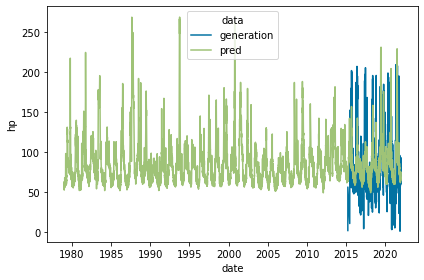

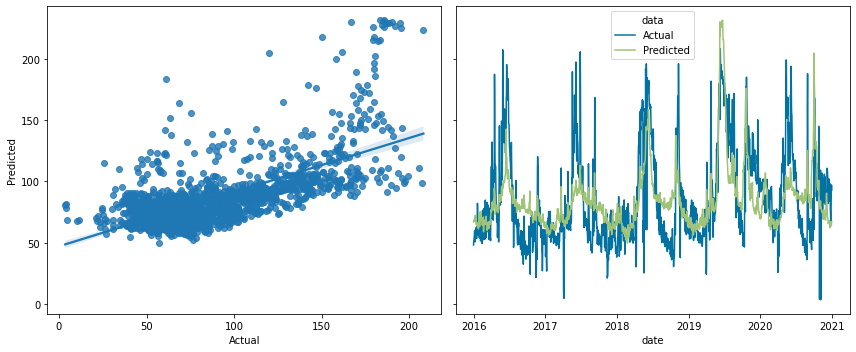

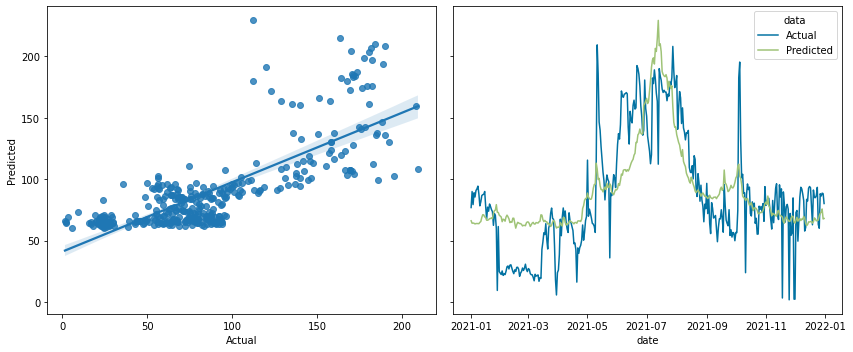

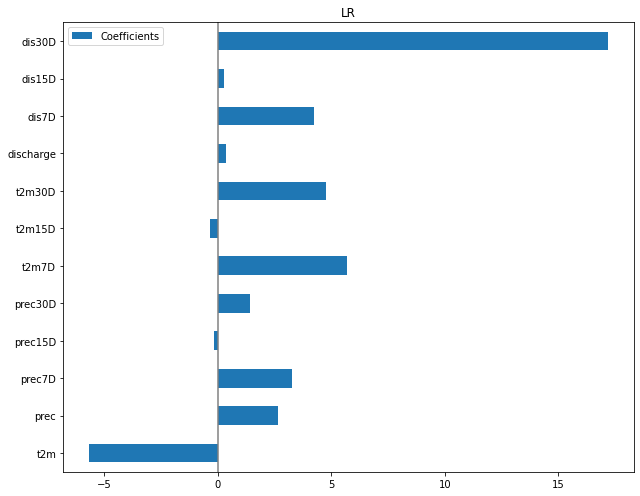

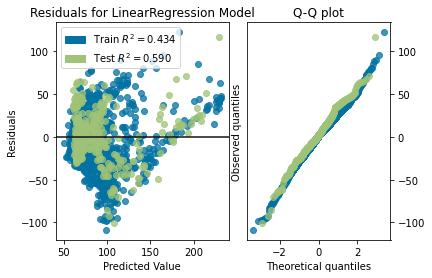

randomforest


/Users/noeliaotero/Documents/OCCR/scripts/jupyter.notes/Hydropower/utils_functions/utils_RF.py:246: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(-mean_score), params)
/Users/noeliaotero/Documents/OCCR/scripts/jupyter.notes/Hydropower/utils_functions/utils_plot.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n['pred'] = pred_recons.flatten()


nan {'n_estimators': 5, 'max_features': 4, 'max_depth': 10}
nan {'n_estimators': 1, 'max_features': 2, 'max_depth': 14}
nan {'n_estimators': 5, 'max_features': 8, 'max_depth': 14}
nan {'n_estimators': 5, 'max_features': 6, 'max_depth': 12}
nan {'n_estimators': 1, 'max_features': 4, 'max_depth': 14}
nan {'n_estimators': 5, 'max_features': 2, 'max_depth': 12}
nan {'n_estimators': 1, 'max_features': 10, 'max_depth': 12}
nan {'n_estimators': 5, 'max_features': 6, 'max_depth': 10}
nan {'n_estimators': 1, 'max_features': 4, 'max_depth': 12}
nan {'n_estimators': 5, 'max_features': 4, 'max_depth': 16}
Score train: 0.9212
Score test: 0.9250
 RMSE: 10.717539
 RMSE: 12.946271
Saving figure AET Leventina_randomforest_reconstruction
Saving figure AET Leventina_randomforesttest
Saving figure AET Leventina_randomforesttrain
Saving figure AET Leventina_randomforestFeature_IMPORT
plotting residuals for AET Leventina
model randomforest


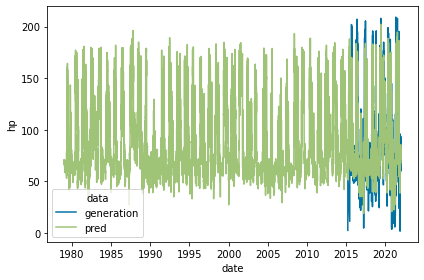

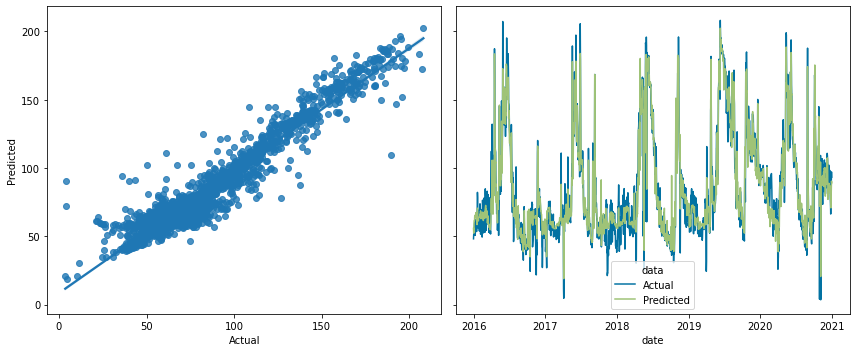

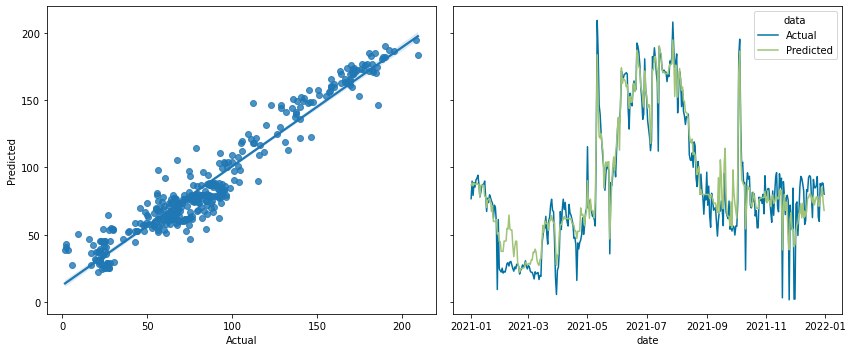

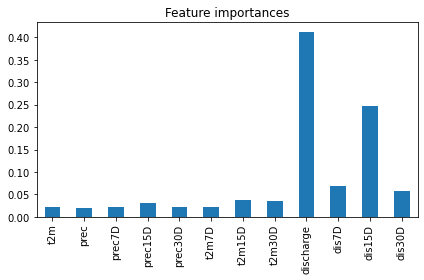

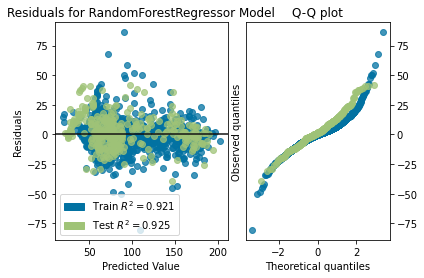

rf_Predefinesplit
Tuned RF params: <bound method BaseEstimator.set_params of RandomForestRegressor(max_depth=10, max_features=2, n_estimators=5)>
Tuned RF Score:  0.9084917860861284
Tuned RF Score:  0.91030995104062
 RMSE: 11.547790
 RMSE: 14.157605


/Users/noeliaotero/Documents/OCCR/scripts/jupyter.notes/Hydropower/utils_functions/utils_plot.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n['pred'] = pred_recons.flatten()


Saving figure AET Leventina_rf_Predefinesplit_reconstruction
Saving figure AET Leventina_rf_Predefinesplittest
Saving figure AET Leventina_rf_Predefinesplittrain
Saving figure AET Leventina_rf_PredefinesplitFeature_IMPORT
plotting residuals for AET Leventina
model rf_Predefinesplit


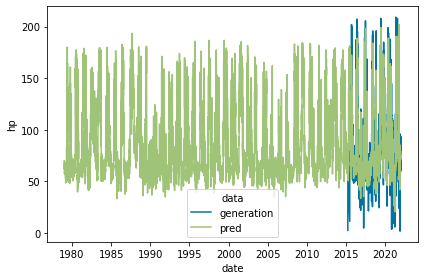

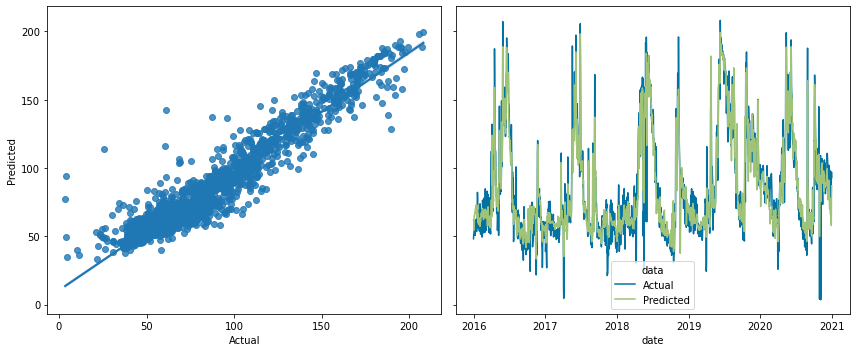

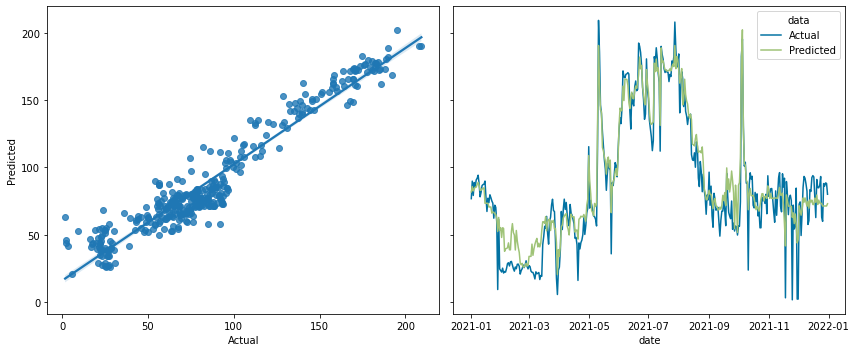

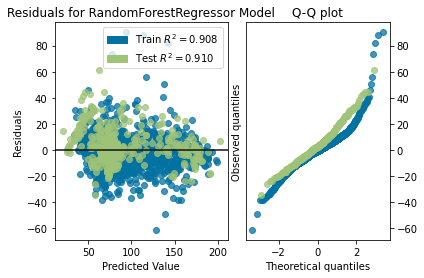

preparing data for 1
linear
Model r-sq mean: 0.6882322057717507
 RMSE: 60.040533
 RMSE: 52.858687


/Users/noeliaotero/opt/anaconda3/envs/py39/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/Users/noeliaotero/Documents/OCCR/scripts/jupyter.notes/Hydropower/utils_functions/utils_plot.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n['pred'] = pred_recons.flatten()


Saving figure Electra-Massa (EM)_linear_reconstruction
Saving figure Electra-Massa (EM)_lineartest
Saving figure Electra-Massa (EM)_lineartrain
Saving figure Electra-Massa (EM)_linearFeature_IMPORT
plotting residuals for Electra-Massa (EM)
model linear


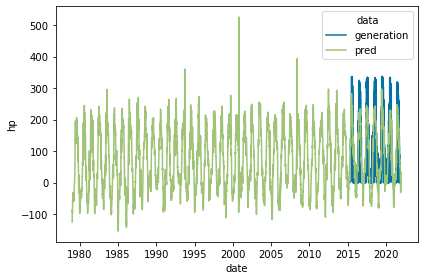

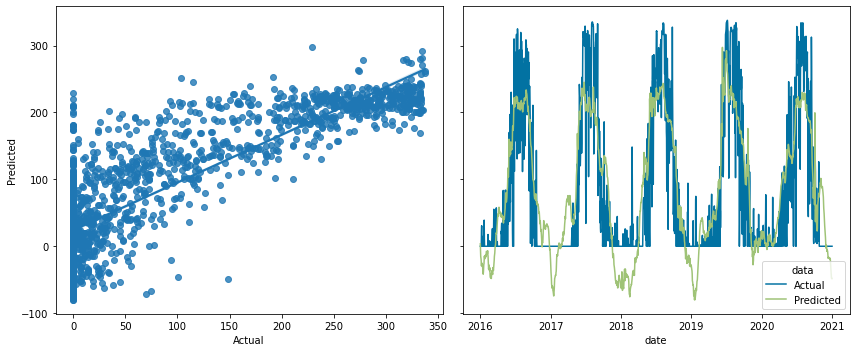

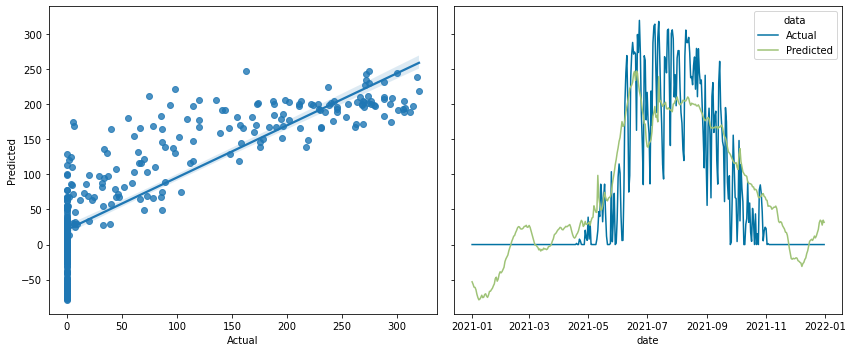

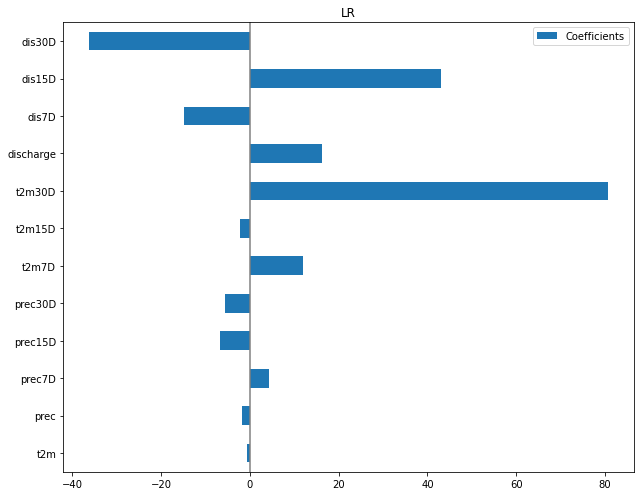

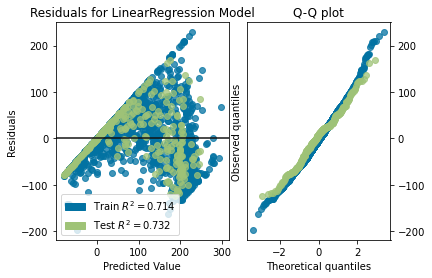

randomforest


/Users/noeliaotero/Documents/OCCR/scripts/jupyter.notes/Hydropower/utils_functions/utils_RF.py:246: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(-mean_score), params)
/Users/noeliaotero/Documents/OCCR/scripts/jupyter.notes/Hydropower/utils_functions/utils_plot.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n['pred'] = pred_recons.flatten()


nan {'n_estimators': 5, 'max_features': 10, 'max_depth': 14}
nan {'n_estimators': 5, 'max_features': 8, 'max_depth': 14}
nan {'n_estimators': 5, 'max_features': 2, 'max_depth': 10}
nan {'n_estimators': 5, 'max_features': 8, 'max_depth': 16}
nan {'n_estimators': 1, 'max_features': 6, 'max_depth': 12}
nan {'n_estimators': 5, 'max_features': 2, 'max_depth': 14}
nan {'n_estimators': 1, 'max_features': 10, 'max_depth': 12}
nan {'n_estimators': 5, 'max_features': 8, 'max_depth': 12}
nan {'n_estimators': 1, 'max_features': 10, 'max_depth': 10}
nan {'n_estimators': 5, 'max_features': 4, 'max_depth': 12}
Score train: 0.9664
Score test: 0.9521
 RMSE: 20.604209
 RMSE: 22.330703
Saving figure Electra-Massa (EM)_randomforest_reconstruction
Saving figure Electra-Massa (EM)_randomforesttest
Saving figure Electra-Massa (EM)_randomforesttrain
Saving figure Electra-Massa (EM)_randomforestFeature_IMPORT
plotting residuals for Electra-Massa (EM)
model randomforest


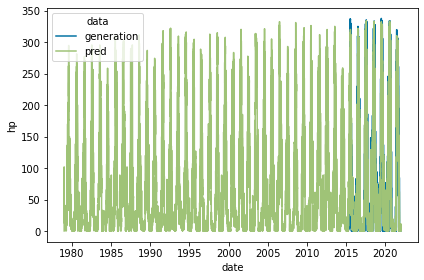

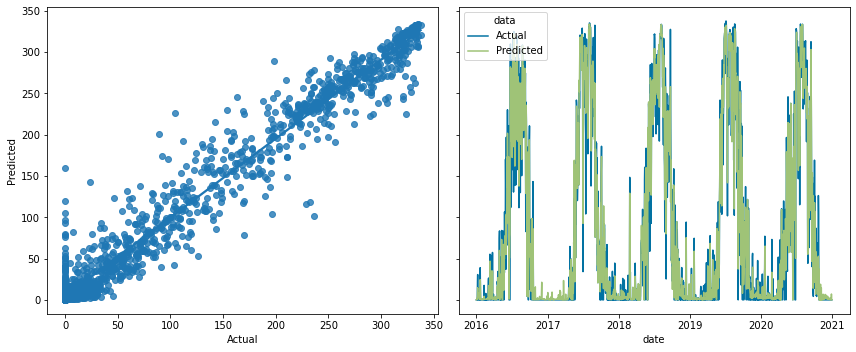

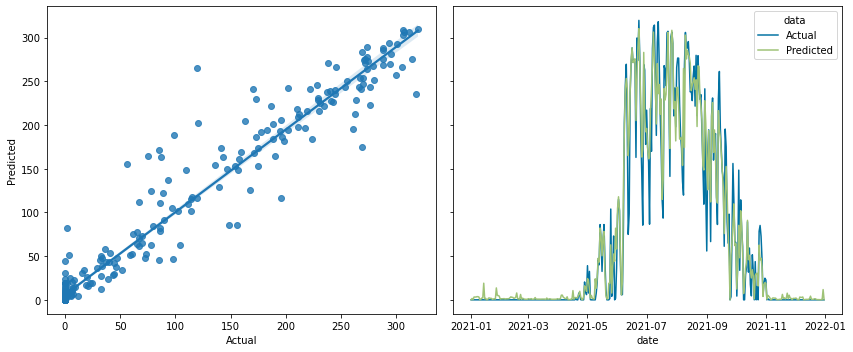

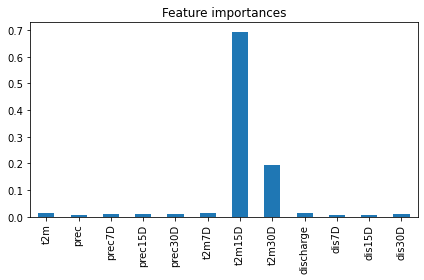

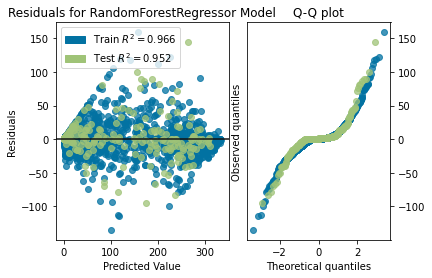

rf_Predefinesplit
Tuned RF params: <bound method BaseEstimator.set_params of RandomForestRegressor(max_depth=10, max_features=6, n_estimators=5)>
Tuned RF Score:  0.9549485798924213
Tuned RF Score:  0.946395258089628
 RMSE: 23.844188
 RMSE: 23.619200


/Users/noeliaotero/Documents/OCCR/scripts/jupyter.notes/Hydropower/utils_functions/utils_plot.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n['pred'] = pred_recons.flatten()


Saving figure Electra-Massa (EM)_rf_Predefinesplit_reconstruction
Saving figure Electra-Massa (EM)_rf_Predefinesplittest
Saving figure Electra-Massa (EM)_rf_Predefinesplittrain
Saving figure Electra-Massa (EM)_rf_PredefinesplitFeature_IMPORT
plotting residuals for Electra-Massa (EM)
model rf_Predefinesplit


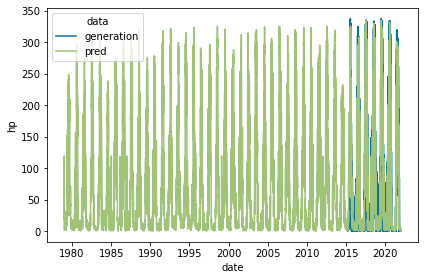

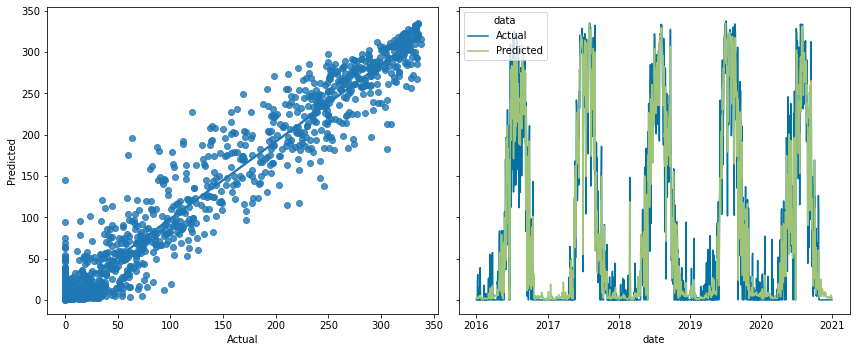

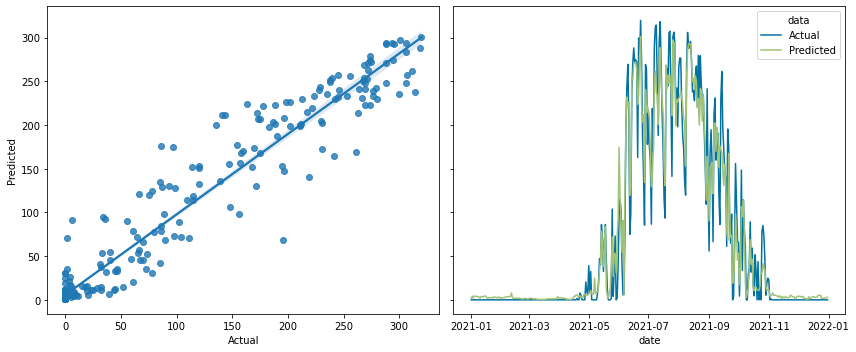

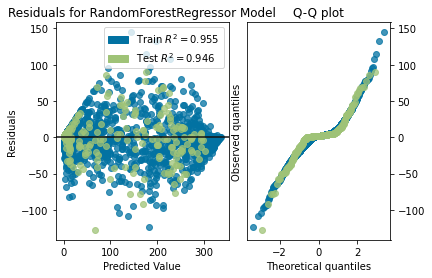

preparing data for 2
selecting different reconstruction dates


/Users/noeliaotero/opt/anaconda3/envs/py39/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/Users/noeliaotero/Documents/OCCR/scripts/jupyter.notes/Hydropower/utils_functions/utils_plot.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n['pred'] = pred_recons.flatten()


linear
Model r-sq mean: -0.0035296085436805403
 RMSE: 44.494683
 RMSE: 39.656475
Saving figure Emosson (ESA)_linear_reconstruction
Saving figure Emosson (ESA)_lineartest
Saving figure Emosson (ESA)_lineartrain
Saving figure Emosson (ESA)_linearFeature_IMPORT
plotting residuals for Emosson (ESA)
model linear


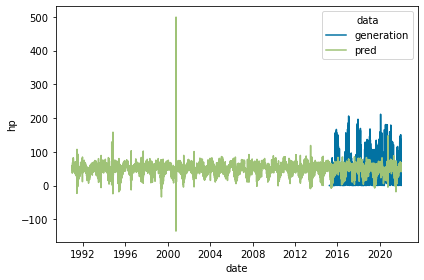

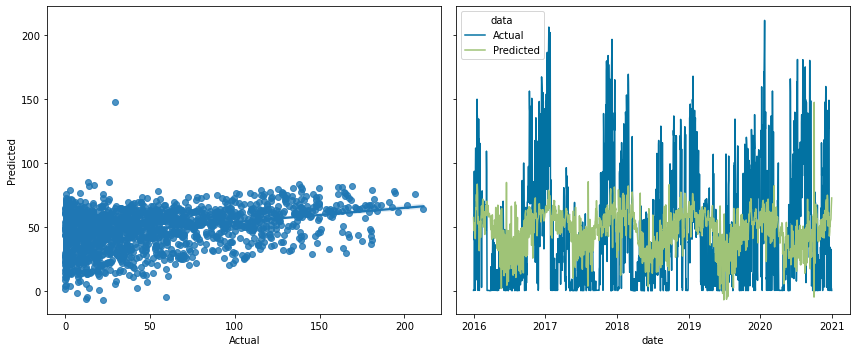

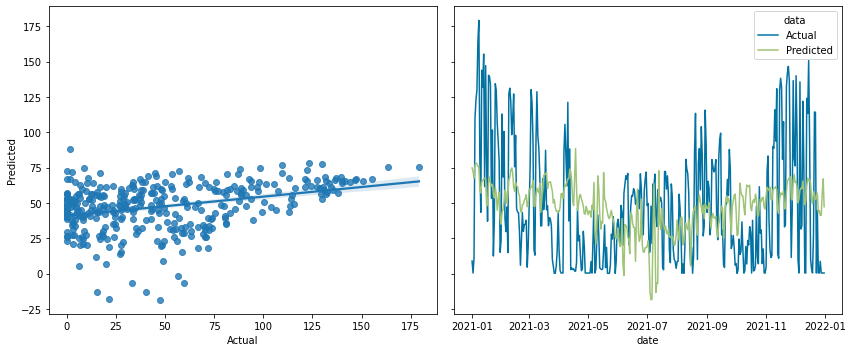

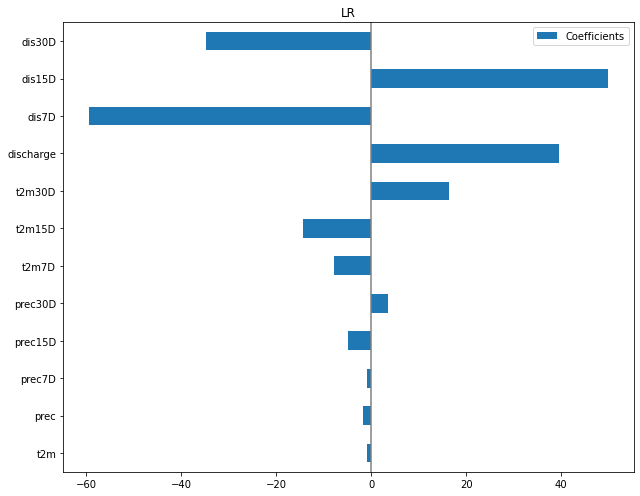

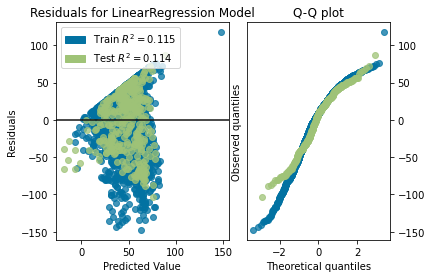

randomforest
0.4361072078898915 {'n_estimators': 5, 'max_features': 10, 'max_depth': 16}
0.7170583495885049 {'n_estimators': 1, 'max_features': 4, 'max_depth': 10}
0.8299589438580558 {'n_estimators': 1, 'max_features': 4, 'max_depth': 14}
0.8493656178915615 {'n_estimators': 1, 'max_features': 10, 'max_depth': 12}
0.34063119510032874 {'n_estimators': 5, 'max_features': 8, 'max_depth': 14}
0.41178050674085664 {'n_estimators': 5, 'max_features': 6, 'max_depth': 16}
0.8322709855741738 {'n_estimators': 1, 'max_features': 4, 'max_depth': 16}
0.8009651267649047 {'n_estimators': 1, 'max_features': 10, 'max_depth': 16}
0.3747738281077154 {'n_estimators': 5, 'max_features': 6, 'max_depth': 14}
0.42619713385840285 {'n_estimators': 5, 'max_features': 10, 'max_depth': 14}
Score train: 0.8822
Score test: 0.8552
 RMSE: 16.230492
 RMSE: 16.029103


/Users/noeliaotero/Documents/OCCR/scripts/jupyter.notes/Hydropower/utils_functions/utils_plot.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n['pred'] = pred_recons.flatten()


Saving figure Emosson (ESA)_randomforest_reconstruction
Saving figure Emosson (ESA)_randomforesttest
Saving figure Emosson (ESA)_randomforesttrain
Saving figure Emosson (ESA)_randomforestFeature_IMPORT
plotting residuals for Emosson (ESA)
model randomforest


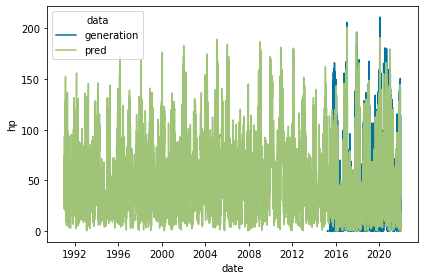

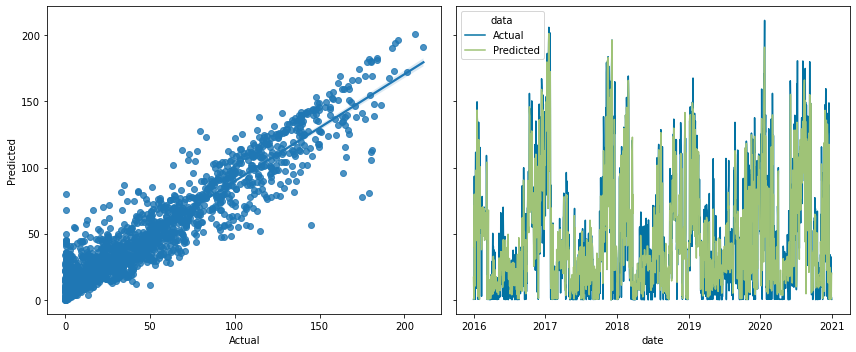

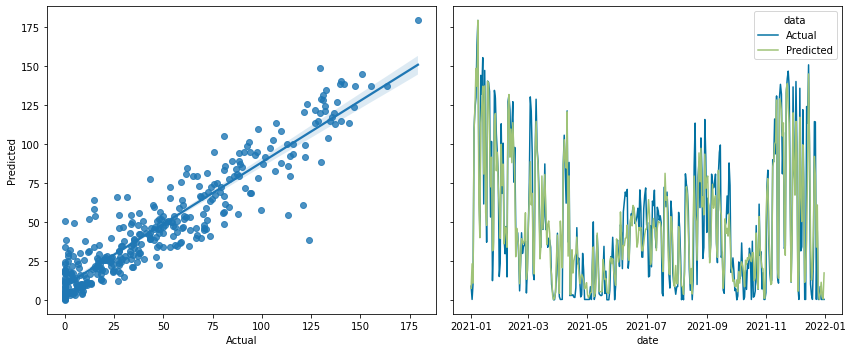

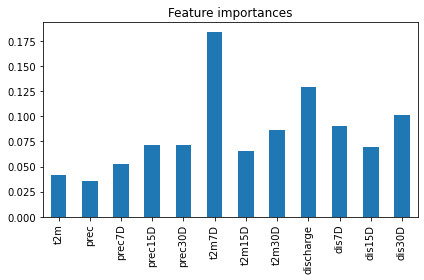

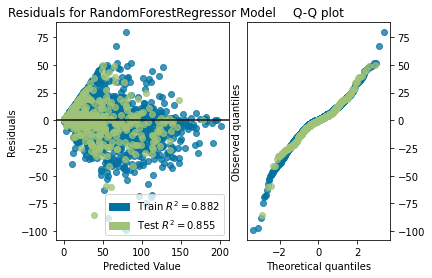

rf_Predefinesplit
Tuned RF params: <bound method BaseEstimator.set_params of RandomForestRegressor(max_depth=10, max_features=6, n_estimators=5)>
Tuned RF Score:  0.7676067907111713
Tuned RF Score:  0.7701800462301491
 RMSE: 22.796719
 RMSE: 20.194563


/Users/noeliaotero/Documents/OCCR/scripts/jupyter.notes/Hydropower/utils_functions/utils_plot.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n['pred'] = pred_recons.flatten()


Saving figure Emosson (ESA)_rf_Predefinesplit_reconstruction
Saving figure Emosson (ESA)_rf_Predefinesplittest
Saving figure Emosson (ESA)_rf_Predefinesplittrain
Saving figure Emosson (ESA)_rf_PredefinesplitFeature_IMPORT
plotting residuals for Emosson (ESA)
model rf_Predefinesplit


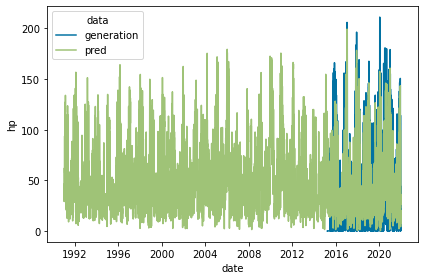

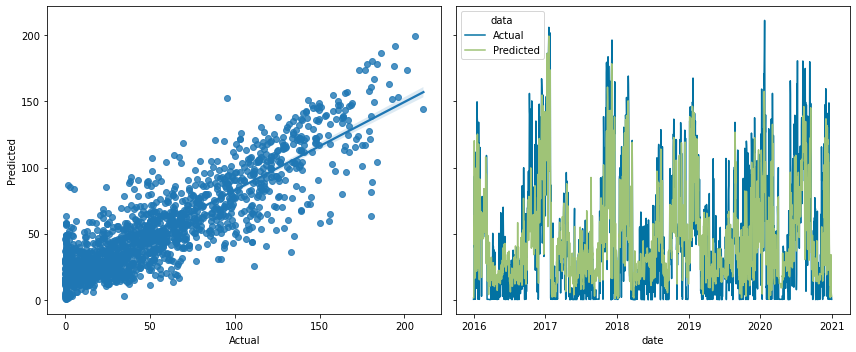

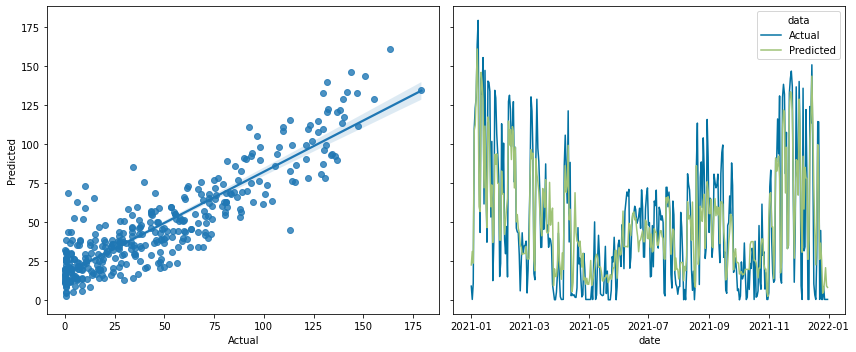

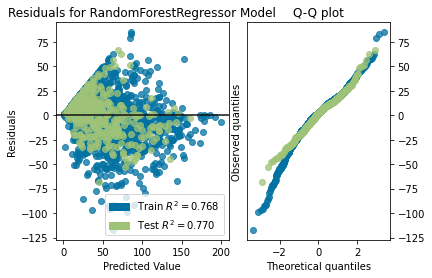

preparing data for 3
linear
Model r-sq mean: -0.021231633760624848
 RMSE: 10.161909
 RMSE: 14.541069


/Users/noeliaotero/opt/anaconda3/envs/py39/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/Users/noeliaotero/Documents/OCCR/scripts/jupyter.notes/Hydropower/utils_functions/utils_plot.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n['pred'] = pred_recons.flatten()


Saving figure KW Rheinfelden CH_linear_reconstruction
Saving figure KW Rheinfelden CH_lineartest
Saving figure KW Rheinfelden CH_lineartrain
Saving figure KW Rheinfelden CH_linearFeature_IMPORT
plotting residuals for KW Rheinfelden CH
model linear


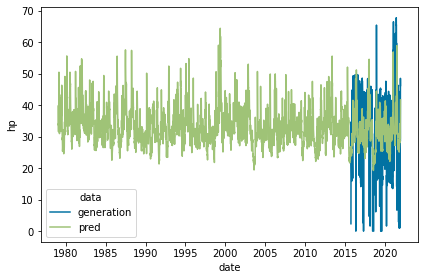

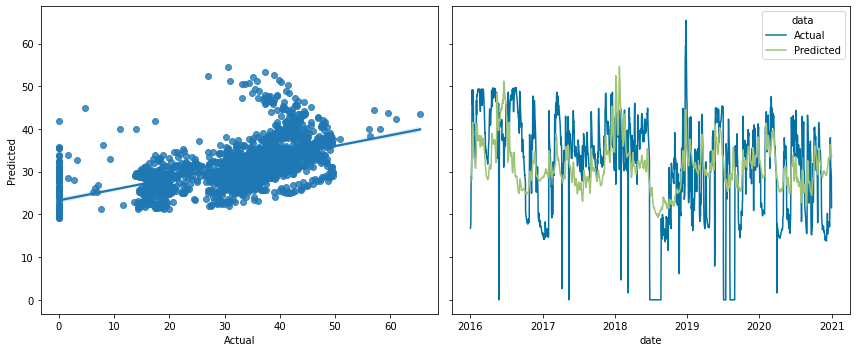

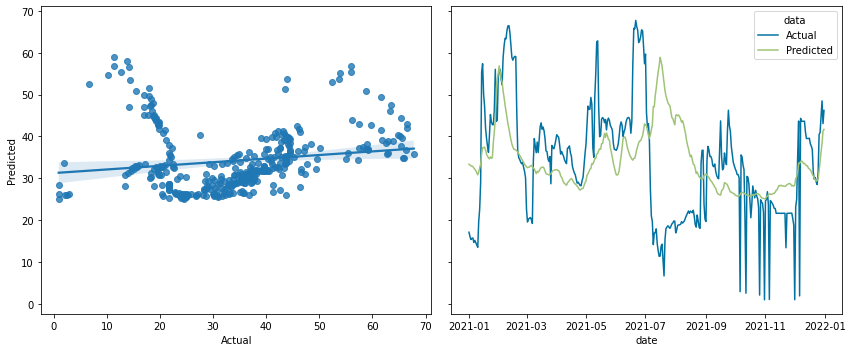

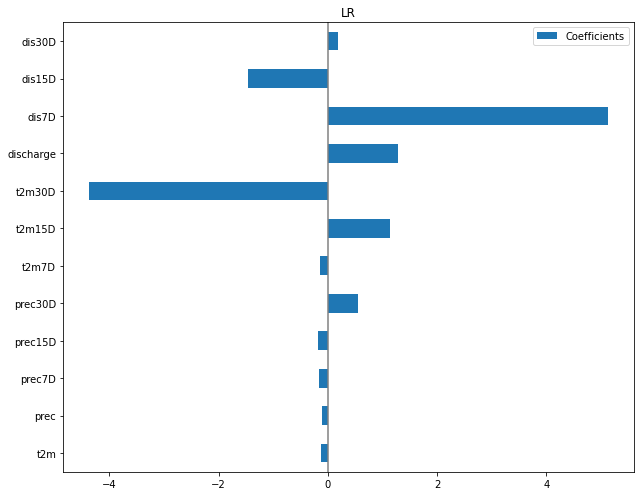

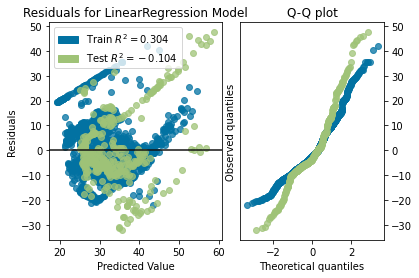

randomforest
0.538831940433786 {'n_estimators': 1, 'max_features': 8, 'max_depth': 10}
0.26026155216658875 {'n_estimators': 5, 'max_features': 4, 'max_depth': 16}
0.351881464800779 {'n_estimators': 5, 'max_features': 8, 'max_depth': 10}
0.5065897238719838 {'n_estimators': 1, 'max_features': 6, 'max_depth': 12}
0.46370399850737726 {'n_estimators': 1, 'max_features': 4, 'max_depth': 12}
0.3609036901274987 {'n_estimators': 5, 'max_features': 8, 'max_depth': 16}
0.5135141408663385 {'n_estimators': 1, 'max_features': 8, 'max_depth': 12}
0.6601649809893381 {'n_estimators': 1, 'max_features': 2, 'max_depth': 16}
0.20538166222207263 {'n_estimators': 5, 'max_features': 4, 'max_depth': 10}
0.3845135772437195 {'n_estimators': 5, 'max_features': 10, 'max_depth': 14}
Score train: 0.8826
Score test: 0.8400
 RMSE: 4.174071
 RMSE: 5.535098


/Users/noeliaotero/Documents/OCCR/scripts/jupyter.notes/Hydropower/utils_functions/utils_plot.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n['pred'] = pred_recons.flatten()


Saving figure KW Rheinfelden CH_randomforest_reconstruction
Saving figure KW Rheinfelden CH_randomforesttest
Saving figure KW Rheinfelden CH_randomforesttrain
Saving figure KW Rheinfelden CH_randomforestFeature_IMPORT
plotting residuals for KW Rheinfelden CH
model randomforest


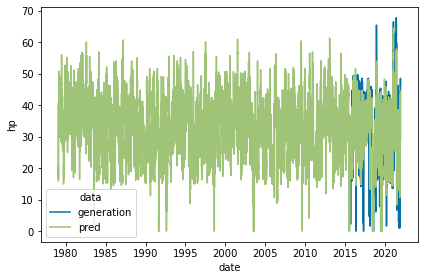

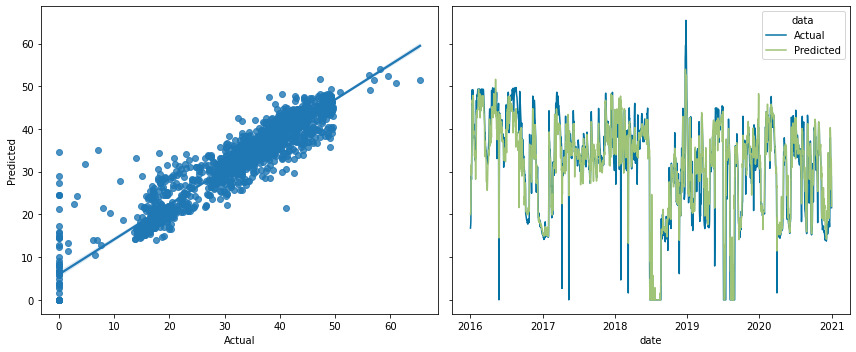

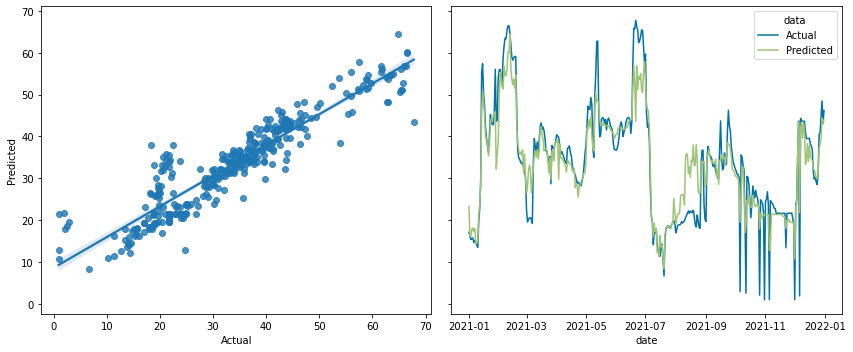

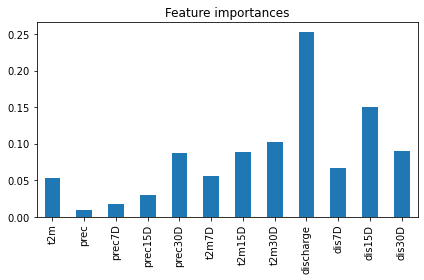

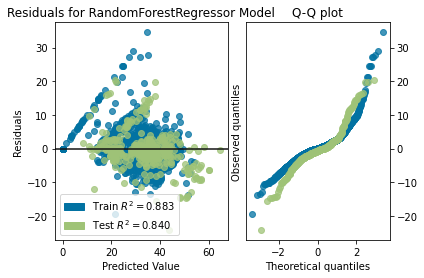

rf_Predefinesplit
Tuned RF params: <bound method BaseEstimator.set_params of RandomForestRegressor(max_depth=10, max_features=4, n_estimators=5)>
Tuned RF Score:  0.8774181461707335
Tuned RF Score:  0.8257429079707684
 RMSE: 4.265129
 RMSE: 5.776234


/Users/noeliaotero/Documents/OCCR/scripts/jupyter.notes/Hydropower/utils_functions/utils_plot.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n['pred'] = pred_recons.flatten()


Saving figure KW Rheinfelden CH_rf_Predefinesplit_reconstruction
Saving figure KW Rheinfelden CH_rf_Predefinesplittest
Saving figure KW Rheinfelden CH_rf_Predefinesplittrain
Saving figure KW Rheinfelden CH_rf_PredefinesplitFeature_IMPORT
plotting residuals for KW Rheinfelden CH
model rf_Predefinesplit


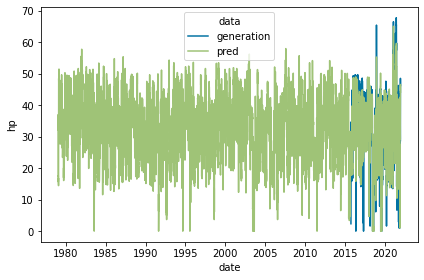

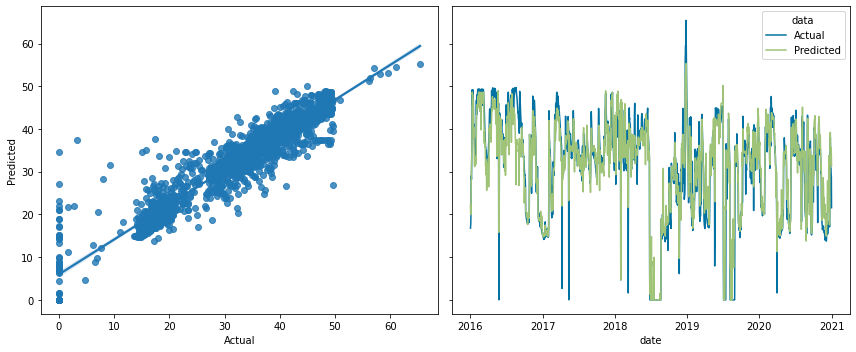

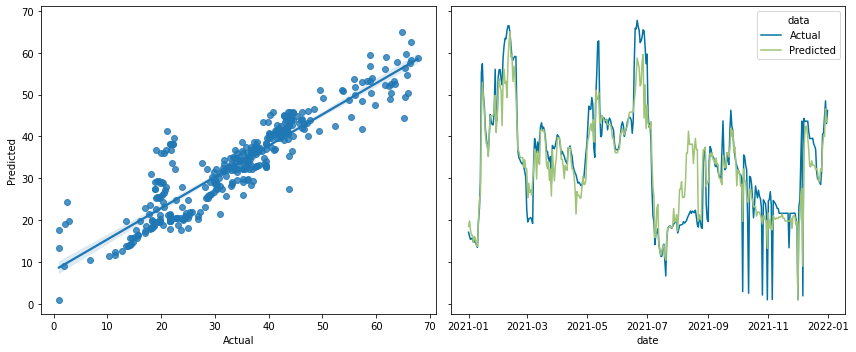

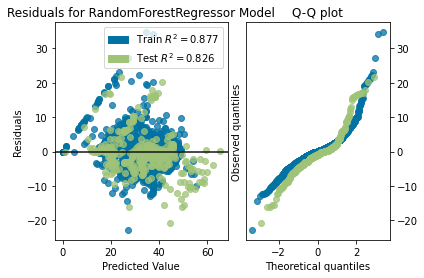

preparing data for 4
linear
Model r-sq mean: -0.05270502422563239
 RMSE: 86.416142
 RMSE: 80.497503


/Users/noeliaotero/opt/anaconda3/envs/py39/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/Users/noeliaotero/Documents/OCCR/scripts/jupyter.notes/Hydropower/utils_functions/utils_plot.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n['pred'] = pred_recons.flatten()


Saving figure Kraftwerke Mauvoisin AG_linear_reconstruction
Saving figure Kraftwerke Mauvoisin AG_lineartest
Saving figure Kraftwerke Mauvoisin AG_lineartrain
Saving figure Kraftwerke Mauvoisin AG_linearFeature_IMPORT
plotting residuals for Kraftwerke Mauvoisin AG
model linear


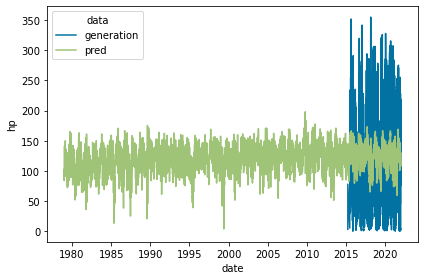

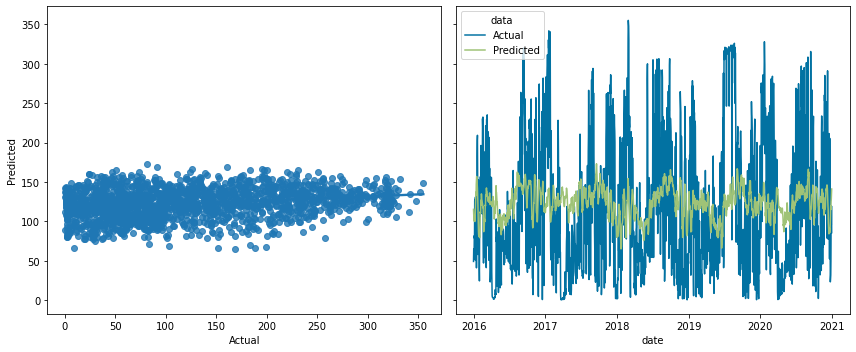

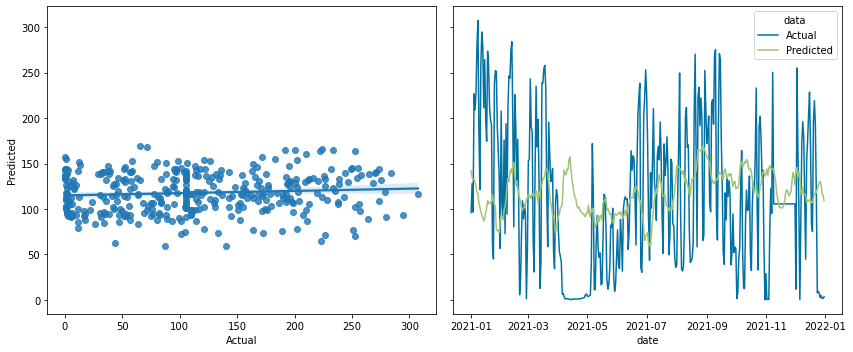

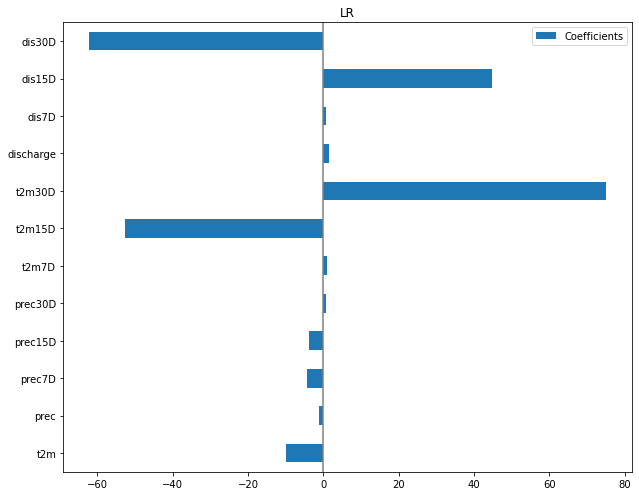

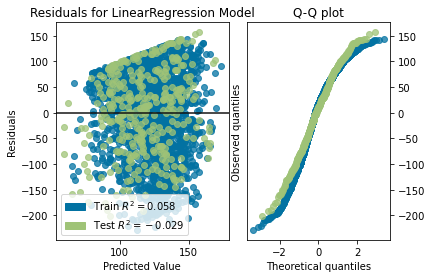

randomforest
0.17525003186883717 {'n_estimators': 5, 'max_features': 2, 'max_depth': 16}
nan {'n_estimators': 5, 'max_features': 2, 'max_depth': 12}
0.26956523400003946 {'n_estimators': 5, 'max_features': 10, 'max_depth': 10}
0.20113189405227938 {'n_estimators': 5, 'max_features': 6, 'max_depth': 14}
0.7517436636635507 {'n_estimators': 1, 'max_features': 10, 'max_depth': 16}
0.03887957482558672 {'n_estimators': 5, 'max_features': 8, 'max_depth': 10}
0.7739265675611288 {'n_estimators': 1, 'max_features': 4, 'max_depth': 12}
0.7605003044030022 {'n_estimators': 1, 'max_features': 2, 'max_depth': 14}
0.6573996284113832 {'n_estimators': 1, 'max_features': 2, 'max_depth': 10}
0.7207231634854712 {'n_estimators': 1, 'max_features': 10, 'max_depth': 14}
Score train: 0.8076
Score test: 0.7593
 RMSE: 39.055486
 RMSE: 38.940757


/Users/noeliaotero/Documents/OCCR/scripts/jupyter.notes/Hydropower/utils_functions/utils_RF.py:246: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(-mean_score), params)
/Users/noeliaotero/Documents/OCCR/scripts/jupyter.notes/Hydropower/utils_functions/utils_plot.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n['pred'] = pred_recons.flatten()


Saving figure Kraftwerke Mauvoisin AG_randomforest_reconstruction
Saving figure Kraftwerke Mauvoisin AG_randomforesttest
Saving figure Kraftwerke Mauvoisin AG_randomforesttrain
Saving figure Kraftwerke Mauvoisin AG_randomforestFeature_IMPORT
plotting residuals for Kraftwerke Mauvoisin AG
model randomforest


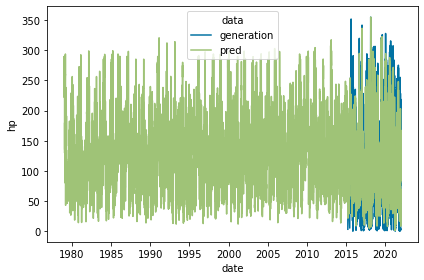

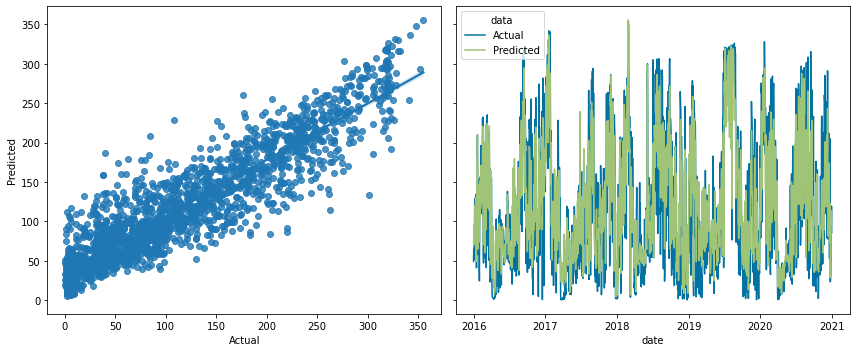

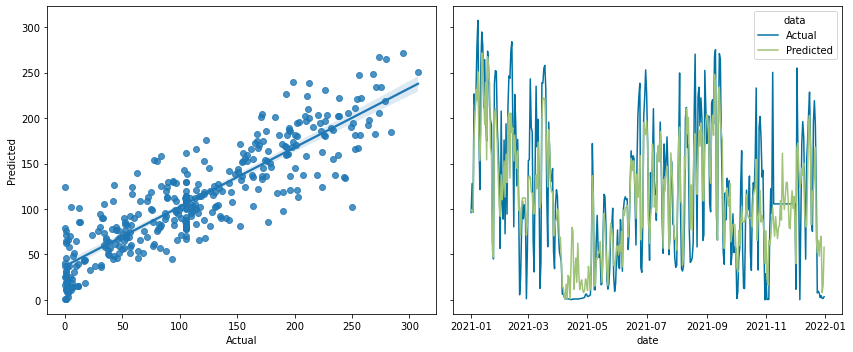

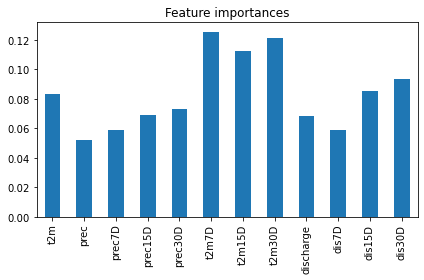

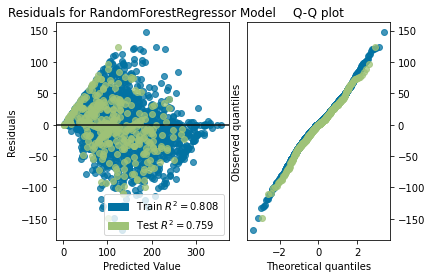

rf_Predefinesplit
Tuned RF params: <bound method BaseEstimator.set_params of RandomForestRegressor(max_depth=16, max_features=4, n_estimators=5)>
Tuned RF Score:  0.8687213731712785
Tuned RF Score:  0.8386190154982471
 RMSE: 32.263370
 RMSE: 31.885532


/Users/noeliaotero/Documents/OCCR/scripts/jupyter.notes/Hydropower/utils_functions/utils_plot.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n['pred'] = pred_recons.flatten()


Saving figure Kraftwerke Mauvoisin AG_rf_Predefinesplit_reconstruction
Saving figure Kraftwerke Mauvoisin AG_rf_Predefinesplittest
Saving figure Kraftwerke Mauvoisin AG_rf_Predefinesplittrain
Saving figure Kraftwerke Mauvoisin AG_rf_PredefinesplitFeature_IMPORT
plotting residuals for Kraftwerke Mauvoisin AG
model rf_Predefinesplit


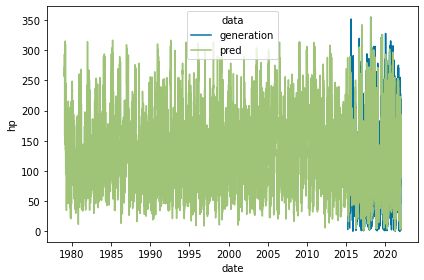

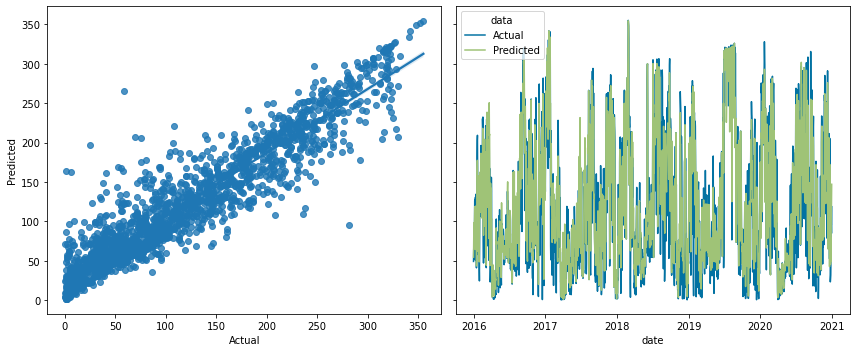

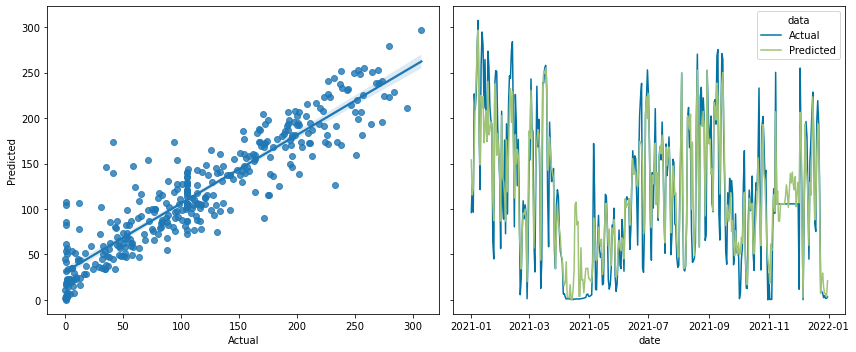

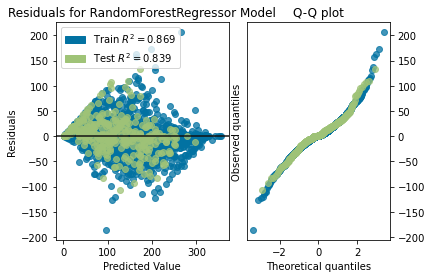

preparing data for 5
selecting different reconstruction dates
linear
Model r-sq mean: 0.27554501227936656
 RMSE: 39.616406
 RMSE: 45.260033


/Users/noeliaotero/opt/anaconda3/envs/py39/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/Users/noeliaotero/Documents/OCCR/scripts/jupyter.notes/Hydropower/utils_functions/utils_plot.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n['pred'] = pred_recons.flatten()


Saving figure Blenio (OFIBLE)_linear_reconstruction
Saving figure Blenio (OFIBLE)_lineartest
Saving figure Blenio (OFIBLE)_lineartrain
Saving figure Blenio (OFIBLE)_linearFeature_IMPORT
plotting residuals for Blenio (OFIBLE)
model linear


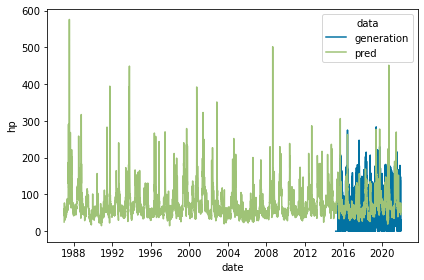

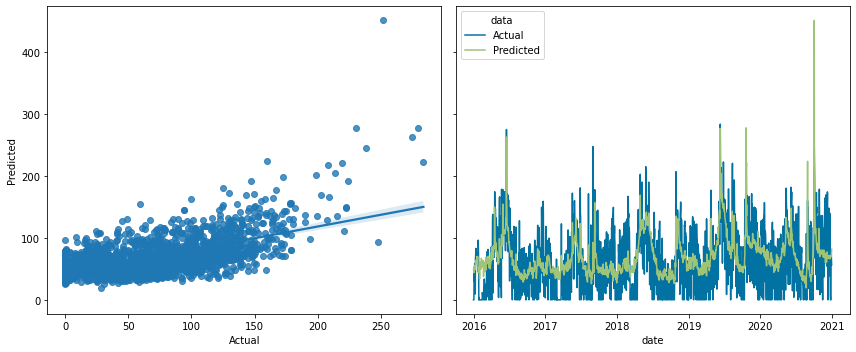

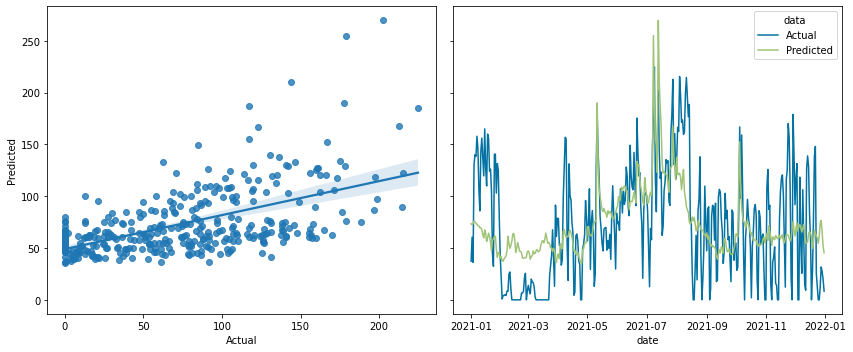

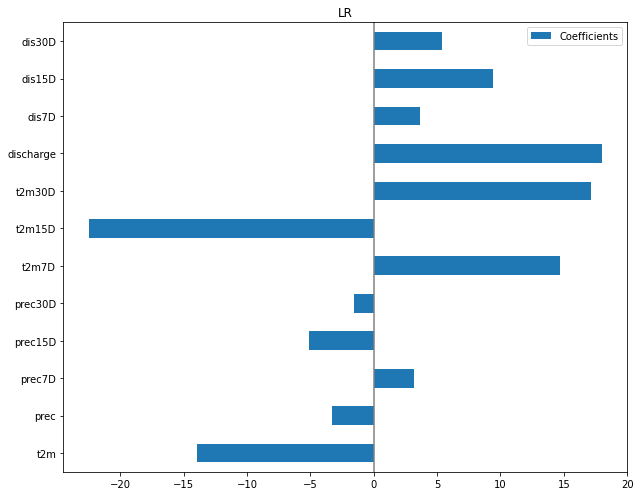

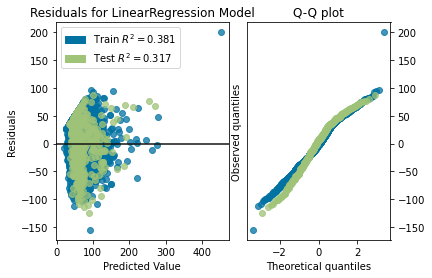

randomforest
0.4195798194726168 {'n_estimators': 1, 'max_features': 10, 'max_depth': 16}
0.4923919200865338 {'n_estimators': 1, 'max_features': 4, 'max_depth': 16}
0.5630480006858732 {'n_estimators': 1, 'max_features': 4, 'max_depth': 12}
nan {'n_estimators': 5, 'max_features': 6, 'max_depth': 12}
0.4505585580351441 {'n_estimators': 1, 'max_features': 8, 'max_depth': 12}
0.36524479202164645 {'n_estimators': 1, 'max_features': 4, 'max_depth': 10}
0.5125747582671857 {'n_estimators': 1, 'max_features': 2, 'max_depth': 16}
nan {'n_estimators': 5, 'max_features': 4, 'max_depth': 16}
nan {'n_estimators': 5, 'max_features': 6, 'max_depth': 10}
nan {'n_estimators': 5, 'max_features': 2, 'max_depth': 16}
Score train: 0.7372
Score test: 0.7714
 RMSE: 25.820051
 RMSE: 26.175606


/Users/noeliaotero/Documents/OCCR/scripts/jupyter.notes/Hydropower/utils_functions/utils_RF.py:246: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(-mean_score), params)
/Users/noeliaotero/Documents/OCCR/scripts/jupyter.notes/Hydropower/utils_functions/utils_plot.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n['pred'] = pred_recons.flatten()


Saving figure Blenio (OFIBLE)_randomforest_reconstruction
Saving figure Blenio (OFIBLE)_randomforesttest
Saving figure Blenio (OFIBLE)_randomforesttrain
Saving figure Blenio (OFIBLE)_randomforestFeature_IMPORT
plotting residuals for Blenio (OFIBLE)
model randomforest


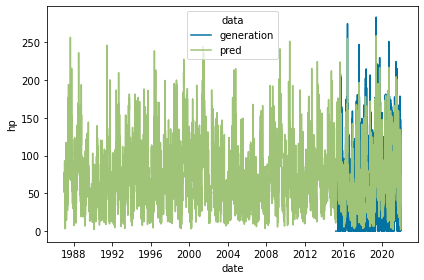

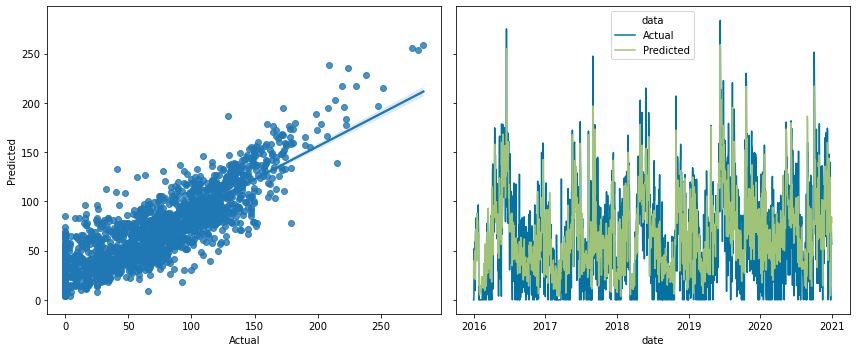

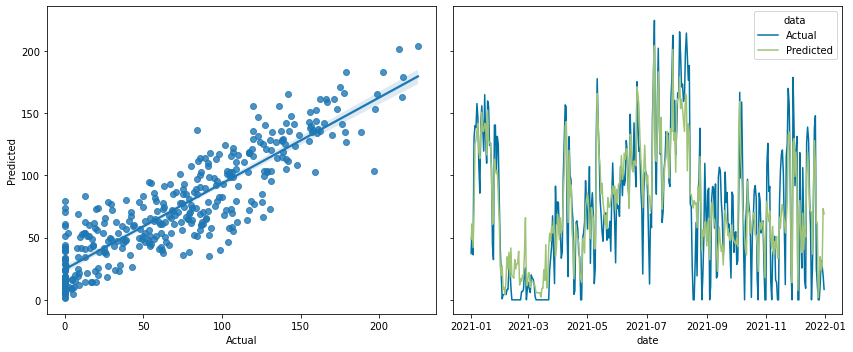

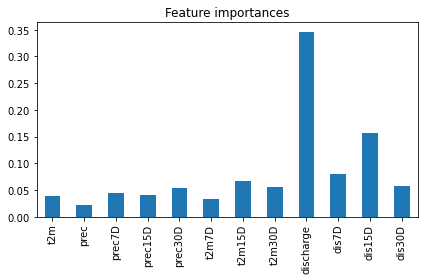

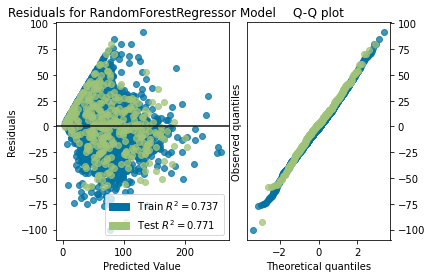

rf_Predefinesplit
Tuned RF params: <bound method BaseEstimator.set_params of RandomForestRegressor(max_depth=14, max_features=4, n_estimators=5)>
Tuned RF Score:  0.8347564837666898
Tuned RF Score:  0.8692517354957119
 RMSE: 20.474026
 RMSE: 19.795644


/Users/noeliaotero/Documents/OCCR/scripts/jupyter.notes/Hydropower/utils_functions/utils_plot.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n['pred'] = pred_recons.flatten()


Saving figure Blenio (OFIBLE)_rf_Predefinesplit_reconstruction
Saving figure Blenio (OFIBLE)_rf_Predefinesplittest
Saving figure Blenio (OFIBLE)_rf_Predefinesplittrain
Saving figure Blenio (OFIBLE)_rf_PredefinesplitFeature_IMPORT
plotting residuals for Blenio (OFIBLE)
model rf_Predefinesplit


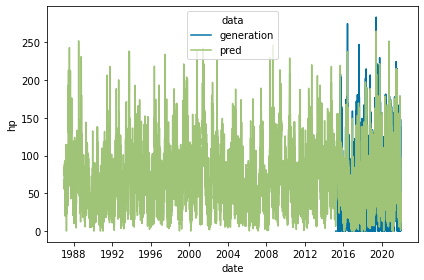

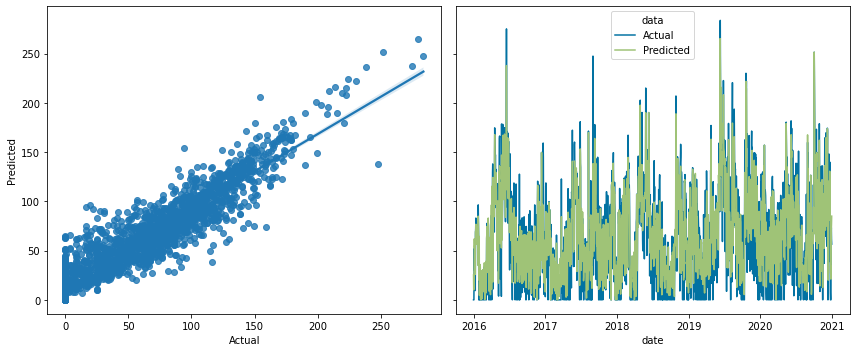

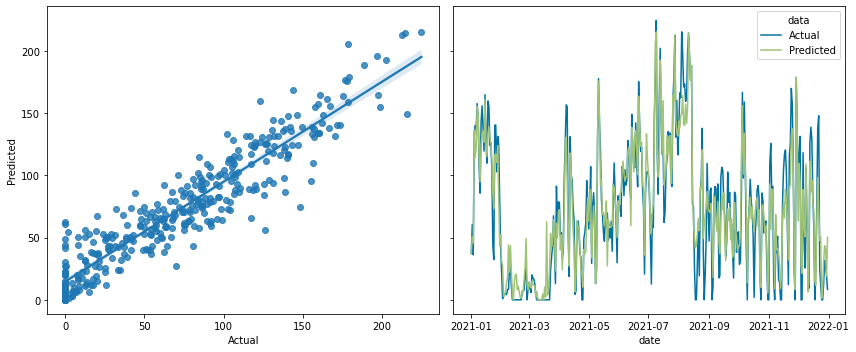

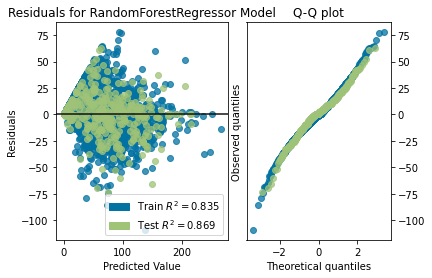

In [62]:
for station in range(0,len(list_input)):
#for station in range(0,2):
    
    print('preparing data for', station)
    df = list_input[station]
    df["date"] = pd.to_datetime(df["date"])
    # to store the results
    name_s = df.name_p.unique()

    name_s = [x for x in name_s if x is not nan]
    name_s = ''.join(name_s)
    
    if name_s == 'Emosson (ESA)':
        print('selecting different reconstruction dates')
        df_i = df[(df.date.dt.year >= YY_Emos_RECONSTRUCTION[0]) &  (df.date.dt.year <= YY_TEST[1])]
        dat_train, dat_test, dat_reconstruction, dates_train, dates_test, dates_recons = splitdata(df,YY_TRAIN, YY_TEST, YY_Emos_RECONSTRUCTION)
    elif name_s == 'Blenio (OFIBLE)':
        print('selecting different reconstruction dates')
        df_i = df[(df.date.dt.year >= YY_OFIBLE_RECONSTRUCTION[0]) &  (df.date.dt.year <= YY_TEST[1])]
        dat_train, dat_test, dat_reconstruction, dates_train, dates_test, dates_recons = splitdata(df,YY_TRAIN, YY_TEST, YY_OFIBLE_RECONSTRUCTION)
    else:  
        df_i = df[(df.date.dt.year >= YY_RECONSTRUCTION[0]) &  (df.date.dt.year <= YY_TEST[1])]
        dat_train, dat_test, dat_reconstruction, dates_train, dates_test, dates_recons = splitdata(df,YY_TRAIN, YY_TEST, YY_RECONSTRUCTION)
   
    X_train_in, y_train, X_test_in, y_test, X_reconstruction_in, X_all_in = preparedata_tomodel(dat_train, dat_test, dat_reconstruction, df_i, colnames, label)
    # For TimesplitSeries
    yy_tot = np.append(dates_train.dt.year, dates_test.dt.year)
    yy = np.unique(yy_tot, return_counts=False)
    
    l_recons = []
    for imod in range(0,len(models)):
        print(models[imod])
        
        if models[imod] == 'linear':
            r=Classicalmodels(models[imod],X_train_in, y_train, X_test_in, y_test, yy, Features, None, csv = True)
        elif models[imod] == 'randomforest':
            r=Classicalmodels(models[imod],X_train_in, y_train, X_test_in, y_test, yy, Features, methods[0], csv = False)
        elif models[imod] == 'rf_Predefinesplit':
            r=Classicalmodels(models[imod],X_train_in, y_train, X_test_in, y_test, yy, Features, None, csv = False)
            
        pred_test = r.model.predict(X_test_in)
        pred_train = r.model.predict(X_train_in)
        rmse_train = evaluate_model(y_train, pred_train)
        rmse_test = evaluate_model(y_test, pred_test)
        mae_train = mean_absolute_error(y_train, pred_train)
        mae_test = mean_absolute_error(y_test, pred_test)
         # add scores
        train_score = r.model.score(X_train_in, y_train)
        test_score = r.model.score(X_test_in, y_test)
        
        
        fig_recons = name_s + '_' + models[imod] + '_reconstruction'
        dat_recons = recons(r.model, X_all_in, df_i)
        
         
        # plot reconstructions
        plot_recons(dat_recons,fig_recons, IMAGES_PATH)
        
        dat_recons.columns = ['date','generation','pred_'+ models[imod]]
        

        df_out = df_out.append({'station': name_s}, ignore_index=True)
        df_out.at[df_out.index[-1],'model'] = models[imod]
        df_out.at[df_out.index[-1], 'train_rmse'] = rmse_train
        df_out.at[df_out.index[-1], 'test_rmse'] = rmse_test
        df_out.at[df_out.index[-1], 'train_mae'] = mae_train
        df_out.at[df_out.index[-1], 'test_mae'] = mae_test
        df_out.at[df_out.index[-1], 'train_score'] = train_score
        df_out.at[df_out.index[-1], 'test_score'] = test_score
       

        # add also the correlations between predicted and observed
        cor_train = stats.pearsonr(pred_train, y_train)[0]
        cor_test = stats.pearsonr(pred_test, y_test)[0]
        df_out.at[df_out.index[-1], 'cor_train'] = cor_train
        df_out.at[df_out.index[-1], 'cor_test'] = cor_test
        
        
        l_recons.append(dat_recons)
        df_recons = pd.concat(l_recons,axis=1)
        df_recons = df_recons.loc[:,~df_recons.columns.duplicated()]
        # remove generation data as I will merge later
        df_recons = df_recons.drop('generation',axis=1)
        # Create the visualizer, fit, score, and show it
         
        if plot:
            
            fig_train = name_s + '_' + models[imod] + 'test' 
            plot_moutput(dates_train, y_train, pred_train, fig_train, IMAGES_PATH)
            fig_test = name_s + '_' + models[imod] + 'train' 
            plot_moutput(dates_test, y_test, pred_test, fig_test, IMAGES_PATH)
            
          # importance
            fig_importance = name_s + '_' + models[imod] + 'Feature_IMPORT'
            show_features(r.model, models[imod], Features, fig_importance, IMAGES_PATH)
            
            print('plotting residuals for',name_s)
            print('model',models[imod])
            plt.figure()
            viz = residuals_plot(r.model, X_train_in, y_train, X_test_in, y_test,hist=False, qqplot=True)

            
    new_df = pd.merge(df_i, df_recons,  on=['date']) 
        
    all_data.append(new_df)
        

In [14]:
# save results
PATH_OUT = '/Users/noeliaotero/Documents/OCCR/Results/Hydro_project/'

In [17]:
names_list = df_out.station.unique()

In [18]:
df_out.to_csv(PATH_OUT + 'ClassicalM_table_perf.csv')

In [64]:
for item in range(0,len(all_data)):
    print(names_list[item])
    all_data[item].to_csv(PATH_data_out  + names_list[item] +'.csv', header=True, index=False)

AET Leventina
Electra-Massa (EM)
Emosson (ESA)
KW Rheinfelden CH
Kraftwerke Mauvoisin AG
Blenio (OFIBLE)


In [63]:
PATH_data_out

'/Users/noeliaotero/Documents/OCCR/data/Output_data/csv/outmodels/Classical/meteo_IDdischarge/'